# Efficienza Spaziale

### Updated to 08 Janaury 2025

Dimensioni rivelatori: ...


Questo notebook contiene la misura dell'efficienza dei tre scintillatori calcolata sfruttando le coincidenze doppie e triple mediante la formula:

$\epsilon_{riv} = \frac{N_{triple}}{N_{doppie}}$
> * I conteggi vengono effettuati ogni 15 minuti.
> * WDT del'onda quadra generata dal discriminatore a 169 per avere $\Delta t$ = 50 ns 
> * Tempo morto [dead time] = 150 ns (impostato a 0)
> * Delay time = 5 ns (per tutti e tre i rivelatori)
> * N.B.: Non si è tenuto conto delle coincidenze accidentali (il conteggio è stato fatto ed è un numero trascurabile rispetto al numero di conteggi singoli)


### Esempio: Efficienza del Secondo Rivelatore

Sfruttiamo le coincidenze triple. Le coincidenze doppie sono relative al primo e al terzo rivelatore: 

$N_{triple} = N_{\mu} \, \epsilon_1 \, \epsilon_2 \, \epsilon_3$,

$N_{doppie} = N_{\mu}\, \epsilon_1 \,\epsilon_2$ $=$ $N_{1,2} $ 
$\Rightarrow$ $\epsilon_3 = \frac{N_{triple}}{N_{1,2}} $


Voltaggi e Threshold: 

$V_1 \, = \, 1150 \, V$,   $Th_1 \, = \, 60 \, mV$

$V_2 \, = \, 1050 \, V$,   $Th_2 \, = \, 90 \, mV$

$V_3 \, = \, 1050 \, V$,   $Th_3 \, = \, 100 \, mV$

### NOTE (Eli):

In alcune celle ci sono dei commenti in italiano per correggere il codice (alcuni indici) in modo da farlo girare senza errori.
Se si vuole modificare il codice (ti vedo Andre) per ottimizzarlo, è ok.

Il codice è già pronto per includere i valori del primo rivelatore (storati in df_1), basta uncommentare le righe opportune.

Una nota per le ultime celle (ho scritto in quali il commento) : loopperei non in voltages, ma in scintillatori = [1, 2, 3], perché looppare in 1150, 1050, 1050 mi sembra un po' misleading. 


In [2]:
#LIBRERIE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import uproot

#PARAMTERI
DELTA_T = 50 * 10 ** (-9) #s
MIN_TEST = 15 #min
SECONDI_TEST = MIN_TEST * 60 #s

#COSTANTI
FIGSIZE_1_1 = (10, 6)
FIGSIZE_3_1 = (10, 18)
FIGSIZE_3_2 = (18, 12)

FONT = "DejaVu Sans"
FONT_DIM = [12,15,18,21,27]
MARKER_SIZE = 4
LINE_WIDTH = 1.5
GRID_COLOR = 'lightgray'
GRID_ALPHA = 0.8


COLORI_BIN = ["tab:blue", "tab:red"]
COLORI_DUE = ["tab:blue", "tab:orange"]
COLORI_TRE = ["tab:blue", "tab:green", "tab:red"]
COLORI_ARC = ["tab:purple", "tab:blue", "tab:green", "tab:olive", "tab:orange", "tab:red"]
COLORI_ARC_10 = ["maroon", "tab:red","darkorange" ,"darkgoldenrod", "tab:olive", "tab:green", "teal", "tab:blue", "tab:purple", "darkmagenta"]


CARTELLA_IMMAGINI = "Immagini/"
ESPORTA_IMMGAGINI = False
FORMATO_IMMAGINI = ".pdf"
DPI = 300

#FONT (LaTeX)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

### Raccolta Dati

In [17]:
# Rivelatore 1 : le doppie sono 2,3

data_1 = {
'V [V]':          np.full(4, 1150),
'Threshold [mV]': np.full(4, 60),
'x [cm]':       [0, 15, 30, 45, ],
'N_singole_1':  [90259, 89404, 88153, 87764],
'N_singole_2':  [30933, 31052, 30622, 31003],
'N_singole_3':  [29708, 29030, 29404, 29966],
'N_doppie_12' : [8862, 8841, 8811, 8336], 
'N_doppie_13' : [21214, 20820, 20987, 21129],
'N_doppie_23' : [8057, 8353, 8380, 7496],  
'N_triple' :    [7559, 7702,7822, 6955],
}

# Rivelatore 2 : le doppie sono 1,3
data_2 = {
'V [V]':          np.full(4, 1050),
'Threshold [mV]': np.full(4, 90),
'x [cm]' :      [0, 15, 30, 45, ],
'N_singole_1':  [92687, 90376, 89329, 89031, ],
'N_singole_2':  [29218, 29279, 29551, 29284, ],
'N_singole_3':  [28843, 28628, 28536, 28932, ],  
'N_doppie_12' : [20496, 20787, 20577, 20450, ],
'N_doppie_13' : [7793, 8250, 8091, 7327, ],
'N_doppie_23' : [8649, 8863, 8730, 8291, ],   
'N_triple' :    [7300, 7785, 7586, 6851, ],
}


# Rivelatore 3 : le doppie sono 1,2
data_3 = {
'V [V]':          np.full(4, 1050),
'Threshold [mV]': np.full(4, 100),
'x [cm]':       [0, 15, 30, 45, ],
'N_singole_1':  [84610, 89479, 88983, 89439, ],
'N_singole_2':  [30043, 30152, 29976, 30263, ],
'N_singole_3':  [28099, 20325, 27960, 28475, ],
'N_doppie_12' : [7661, 8114, 7993, 7325, ],
'N_doppie_13' : [20315, 20500, 20243, 20421, ],
'N_doppie_23' : [8502, 8736, 8662, 8313, ],
'N_triple' :    [7179, 7590, 7529, 6897, ],
}


df_1 = pd.DataFrame(data_1)
df_2 = pd.DataFrame(data_2)
df_3 = pd.DataFrame(data_3)

# Non serve : 
# df_1000V = df_1000V.sort_values(by='Th [mV]')
# df_1050V = df_1050V.sort_values(by='Th [mV]')
# df_1100V = df_1100V.sort_values(by='Th [mV]')

Asse_x = {
  #  1000: np.array([0, 20, 40, 60, 80, 100, 120, 140, 160]),
    1050: np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]),
    1100: np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]),
}

dataframes =    [df_1, df_2, df_3, ] # aggiungere prima df_1
voltages   =    [1100, 1050, 1050, ] # aggiungere prima 1100, 
# x          =    [0, 15, 30, 45, ]

In [31]:
# LEGGIMI !!!
# LEGGERE I COMMENTI IN ITALIANO PER MODIFICARE OPPORTUNAMENTE IL CODICE PER 
# RIUSCIRE ALMENO A FARLO GIRARE

# Iterate through dataframes and calculate the required quantities
for i, df in enumerate(dataframes):
    # Calculate double coincidences
    N_doppie_acc_12 = (df['N_singole_1'] / SECONDI_TEST) * (df['N_singole_2'] / SECONDI_TEST) * DELTA_T
    N_doppie_acc_13 = (df['N_singole_1'] / SECONDI_TEST) * (df['N_singole_3'] / SECONDI_TEST) * DELTA_T
    N_doppie_acc_23 = (df['N_singole_2'] / SECONDI_TEST) * (df['N_singole_3'] / SECONDI_TEST) * DELTA_T

    # Calculate triple coincidences
    N_triple_acc = (
        (df['N_singole_1'] / SECONDI_TEST) *
        (df['N_singole_2'] / SECONDI_TEST) *
        (df['N_singole_3'] / SECONDI_TEST) *
        DELTA_T ** 2
    )

    # Store results in the dataframe
    df['N_doppie_acc_12'] = N_doppie_acc_12
    df['N_doppie_acc_13'] = N_doppie_acc_13
    df['N_doppie_acc_23'] = N_doppie_acc_23
    df['N_triple_acc'] = N_triple_acc

# Calculate epsilon and sigma_epsilon for the specific cases
if len(dataframes) >= 3: # QUANDO VENGONO PRESI I DATI PER IL RIVELATORE 1, QUESTO DIVENTA >= 3: !!!!!!
    # Assign the first and second dataframes
    df_1 = dataframes[0]  # QUANDO VENGONO PRESI I DATI PER IL RIVELATORE 1, CAMBIARE QUESTI INDICI !!! 
    df_2 = dataframes[1] # DIVENTA df_2 = dataframes[1]
    df_3 = dataframes[2] # DIVENTA df_3 = dataframes[2]

    # Calculate epsilon for df_1 
    df_1['epsilon'] = df_1['N_triple'] / df_1['N_doppie_23']
    df_1['sigma_epsilon'] = np.sqrt(df_1['epsilon'] / df_1['N_doppie_23']) * (1 - df_1['epsilon'])

    # Calculate epsilon for df_2
    df_2['epsilon'] = df_2['N_triple'] / df_2['N_doppie_13']
    df_2['sigma_epsilon'] = np.sqrt(df_2['epsilon'] / df_2['N_doppie_13'] * (1 - df_2['epsilon']))

    # Calculate epsilon_2 for df_3
    df_3['epsilon'] = df_3['N_triple'] / df_3['N_doppie_12']
    df_3['sigma_epsilon'] = np.sqrt(df_3['epsilon'] / df_3['N_doppie_12'] * (1 - df_3['epsilon']))

# Adjust the single counts after calculations
for df in dataframes:
    df['N_singole_1'] = df['N_singole_1'] / MIN_TEST
    df['N_singole_2'] = df['N_singole_2'] / MIN_TEST
    df['N_singole_3'] = df['N_singole_3'] / MIN_TEST


In [8]:
# Initialize a dictionary to store epsilon values
epsilon_data = {}
sigma_epsilon_data = {}

# Loop through the DataFrames and add epsilon values as columns
for i, df in enumerate(dataframes, start=1):
    epsilon_data[f'epsilon_df_{i}'] = df['epsilon']
    sigma_epsilon_data[f'sigma_epsilon_df_{i}'] = df['sigma_epsilon']

# Create a new DataFrame for epsilon values
epsilon_df = pd.DataFrame(epsilon_data)
sigma_epsilon_df = pd.DataFrame(sigma_epsilon_data)

efficiency_df = pd.concat([epsilon_df, sigma_epsilon_df], axis=1)

In [9]:
efficiency_df

# N.B. : Se alcuni valori sono NaN è solo perché non abbiamo preso quei dati
# inoltre questo confronto è poco fair perché efficienze della stessa riga NON
# corrispondono necessariamente a threshold uguali
# è giusto un confronto visivo tra voltaggi (e NON threshold)

,epsilon_df_1,epsilon_df_2,epsilon_df_3,sigma_epsilon_df_1,sigma_epsilon_df_2,sigma_epsilon_df_3
0,0.938190,0.936738,0.937084,0.003288,0.002758,0.002774
1,0.922064,0.943636,0.935420,0.003346,0.002539,0.002729
2,0.933413,0.937585,0.941949,0.003338,0.002689,0.002616
3,0.927828,0.935035,0.941570,0.003233,0.002879,0.002741


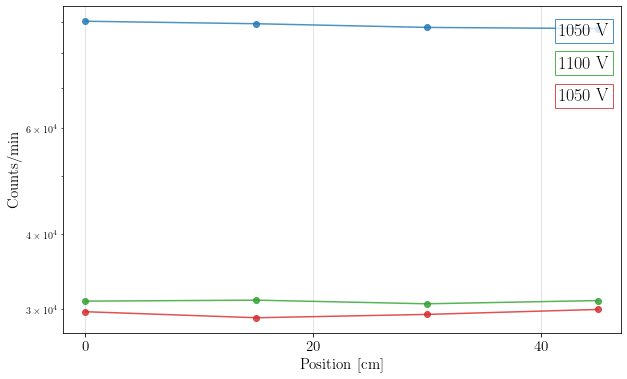

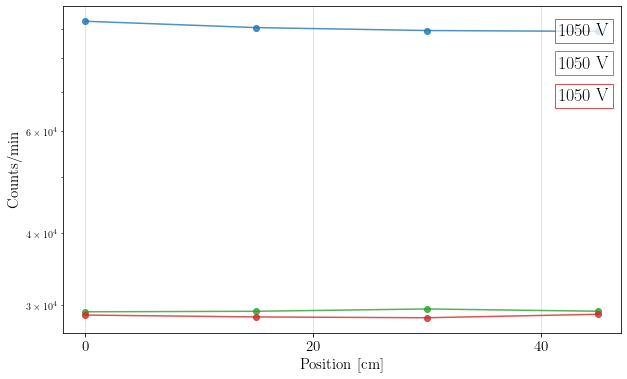

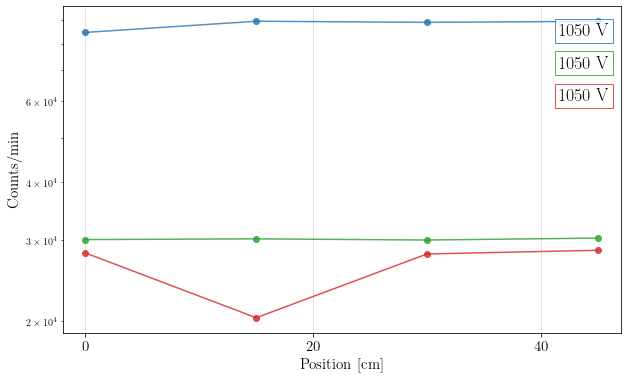

In [18]:
# Questa cella va sistemata, non lo faccio ora perché le singole non ci interessano ma se si vuole si può fare
# Loopperei non in voltages ma tipo in scintillatori = [1, 2, 3]
# va sistemato anche qualcos'altro nel loop grazieee

for df, voltage in zip(dataframes, voltages):
    plt.figure(figsize = FIGSIZE_1_1)

    plt.plot(df['x [cm]'], df['N_singole_1'], linestyle = '-', marker = 'o', 
             linewidth = LINE_WIDTH, color = COLORI_TRE[0], alpha = GRID_ALPHA)
    plt.plot(df['x [cm]'], df['N_singole_2'], linestyle = '-', marker = 'o', 
             linewidth = LINE_WIDTH, color = COLORI_TRE[1], alpha = GRID_ALPHA)
    plt.plot(df['x [cm]'], df['N_singole_3'], linestyle = '-', marker = 'o', 
             linewidth = LINE_WIDTH, color = COLORI_TRE[2], alpha = GRID_ALPHA)

    #plt.title('Counts per Minute vs Threshold Voltage', fontsize = FONT_DIM[1])
    plt.xlabel('Position [cm]', fontsize = FONT_DIM[1])
    plt.ylabel('Counts/min', fontsize = FONT_DIM[1])

    plt.xticks(Asse_x[voltage], fontsize = FONT_DIM[1])
    plt.yticks(fontsize = FONT_DIM[1])

    plt.xlim(-2, df['x [cm]'].max() + 2)
    
    plt.yscale('log')
    plt.grid(True, color = 'lightgray',  alpha = GRID_ALPHA)
    
    ax = plt.gca()  # Ottieni l'oggetto Axes corrente
    ax.text(0.98, 0.95,  # Coordinate relative (x, y)
            '1050 V', 
            fontsize=FONT_DIM[2], 
            bbox=dict(facecolor='white', alpha=GRID_ALPHA, edgecolor=COLORI_TRE[0]),
            transform=ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha='right',  # Allineamento orizzontale a destra
            va='top')    # Allineamento verticale in alto
    ax.text(0.98, 0.85,  # Coordinate relative (x, y)
            f'{voltage} V', 
            fontsize=FONT_DIM[2], 
            bbox=dict(facecolor='white', alpha=GRID_ALPHA, edgecolor=COLORI_TRE[1]),
            transform=ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha='right',  # Allineamento orizzontale a destra
            va='top')    # Allineamento verticale in alto
    ax.text(0.98, 0.75,  # Coordinate relative (x, y)
            '1050 V',  
            fontsize=FONT_DIM[2], 
            bbox=dict(facecolor='white', alpha=GRID_ALPHA, edgecolor=COLORI_TRE[2]),
            transform=ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha='right',  # Allineamento orizzontale a destra
            va='top')    # Allineamento verticale in alto

    #plt.tight_layout()

    if ESPORTA_IMMGAGINI:
        plt.savefig(CARTELLA_IMMAGINI + "2_3_plateau_" + f'{voltage}' + "_V" + FORMATO_IMMAGINI, bbox_inches = "tight", dpi=DPI)

plt.show()

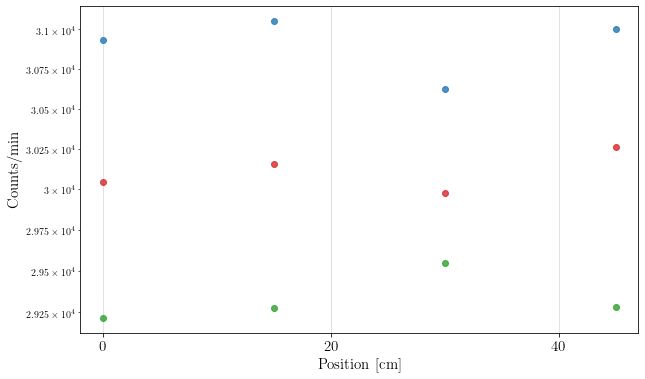

In [20]:
# Create a single figure for the three curves
plt.figure(figsize = FIGSIZE_1_1)

for iPlot, (df, voltage) in enumerate(zip(dataframes, voltages)):
    plt.plot(df['x [cm]'], df['N_singole_2'], linestyle = '', marker = 'o', 
             linewidth = LINE_WIDTH, color = COLORI_TRE[iPlot], alpha = GRID_ALPHA)

# Add titles and labels
#plt.title('Counts per Minute vs Threshold Voltage', fontsize = FONT_DIM[1])
plt.xlabel('Position [cm]', fontsize = FONT_DIM[1])
plt.ylabel('Counts/min', fontsize = FONT_DIM[1])

plt.xticks(Asse_x[1050], fontsize = FONT_DIM[1])
plt.yticks(fontsize = FONT_DIM[1])

plt.xlim(-2, df['x [cm]'].max() + 2)

plt.yscale('log')
plt.grid(True, color = 'lightgray',  alpha = GRID_ALPHA)

if ESPORTA_IMMGAGINI:
    plt.savefig(CARTELLA_IMMAGINI + "2_3_plateau_completo" + FORMATO_IMMAGINI, bbox_inches = "tight", dpi=DPI)

plt.show()


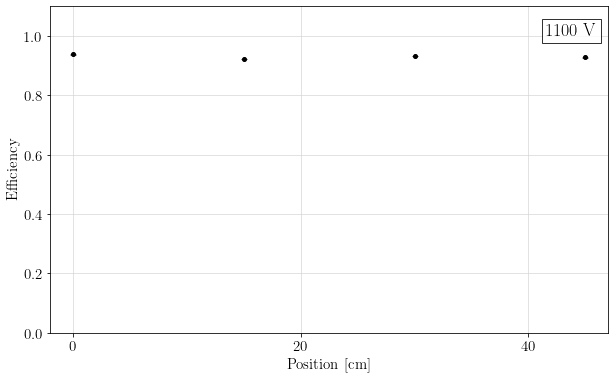

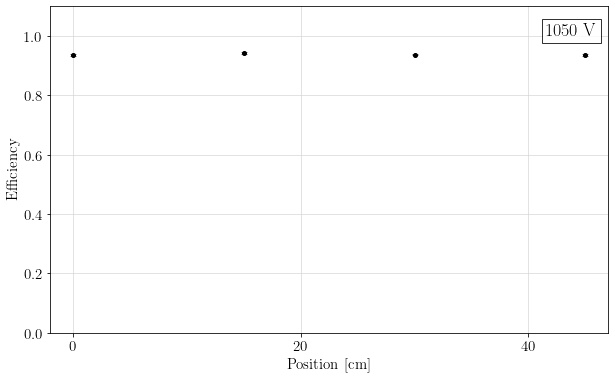

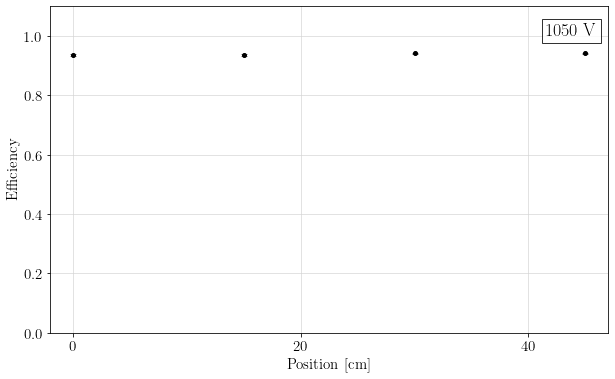

In [32]:
# Al posto che looppare su voltages, loopperei su scintillatori = [1, 2, 3] così gli indici sono quelli
# avere come indici voltages è misleading

for df, voltage in zip(dataframes, voltages):
    plt.figure(figsize=FIGSIZE_1_1)
    
    # Plot with error bars
    plt.errorbar(
        df['x [cm]'], df['epsilon'], 
        yerr=df['sigma_epsilon'],  # Error bar values
        fmt='o', markersize=4, linewidth=0, color='black',  # Marker and line settings
        ecolor='gray', elinewidth=1, capsize=3  # Error bar style
    )
    
    #plt.title('Efficiency vs Threshold Voltage', fontsize = FONT_DIM[1])
    plt.xlabel('Position [cm]', fontsize = FONT_DIM[1])
    plt.ylabel('Efficiency', fontsize = FONT_DIM[1])

    plt.xticks(Asse_x[voltage], fontsize = FONT_DIM[1])
    plt.yticks(fontsize = FONT_DIM[1])

    plt.xlim(-2, df['x [cm]'].max() + 2)
    plt.ylim(0, 1.1)   
    
    plt.grid(True, color = 'lightgray',  alpha = GRID_ALPHA)
    
    ax = plt.gca()  # Ottieni l'oggetto Axes corrente
    ax.text(0.98, 0.95,  # Coordinate relative (x, y)
            f'{voltage} V', 
            fontsize = FONT_DIM[2], 
            bbox = dict(facecolor = 'white', alpha = GRID_ALPHA, edgecolor = 'black'),
            transform = ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha = 'right',  # Allineamento orizzontale a destra
            va = 'top')    # Allineamento verticale in alto

    #plt.tight_layout()

    if ESPORTA_IMMGAGINI:
        plt.savefig(CARTELLA_IMMAGINI + "2_3_efficienza_" + f'{voltage}' + "_V" + FORMATO_IMMAGINI, bbox_inches = "tight", dpi=DPI)

plt.show()

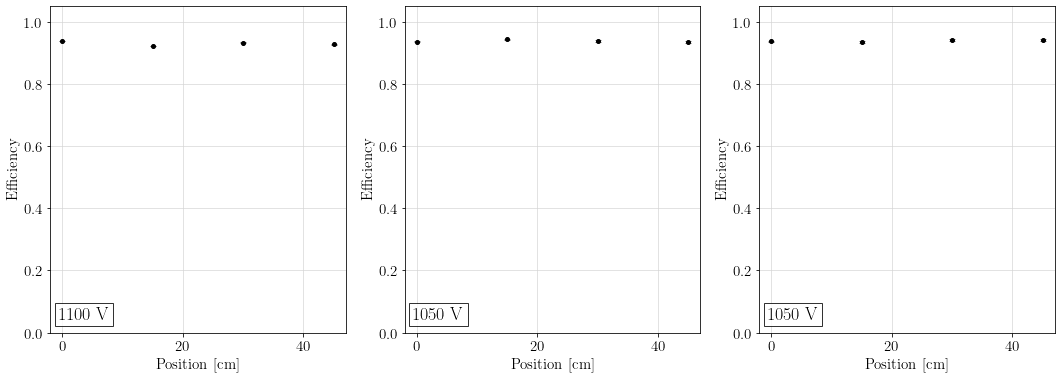

In [33]:
# Create subplots grid (4 rows x 3 columns)
rows, cols = 1, 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 6), sharex=False, sharey=False)

# Appiattisci gli assi per iterare facilmente
axes_flat = axes.flatten()

# Loop over dataframes and axes
for iPlot, (df, voltage) in enumerate(zip(dataframes, voltages)):
    ax = axes_flat[iPlot]

    ax.errorbar(
        df['x [cm]'], df['epsilon'], 
        yerr = df['sigma_epsilon'],  # Error bar values
        fmt = 'o', markersize=4, linewidth=0, color='black',  # Marker and line settings
        ecolor='gray', elinewidth=1, capsize=3  # Error bar style
    )
    
    #plt.title('Efficiency vs Threshold Voltage', fontsize = FONT_DIM[1])
    ax.set_xlabel('Position [cm]', fontsize = FONT_DIM[1])
    ax.set_ylabel('Efficiency', fontsize = FONT_DIM[1])

    ax.set_xticks(Asse_x[voltage])
    ax.tick_params(axis='x', labelsize=FONT_DIM[1])
    ax.tick_params(axis='y', labelsize=FONT_DIM[1])

    ax.set_xlim(-2, df['x [cm]'].max() + 2)
    ax.set_ylim(0, 1.05)   
    
    ax.grid(True, color = 'lightgray',  alpha = GRID_ALPHA)

    ax.text(0.20, 0.08,  # Coordinate relative (x, y)
            f'{voltage} V', 
            fontsize = FONT_DIM[2], 
            bbox = dict(facecolor = 'white', alpha = GRID_ALPHA, edgecolor = 'black'),
            transform = ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha = 'right',  # Allineamento orizzontale a destra
            va = 'top')    # Allineamento verticale in alto

# Disposizione finale e visualizzazione
#plt.tight_layout()

if ESPORTA_IMMGAGINI:
        plt.savefig(CARTELLA_IMMAGINI + "2_3_efficienza_per_tensione" + FORMATO_IMMAGINI, bbox_inches = "tight", dpi=DPI)

plt.show()

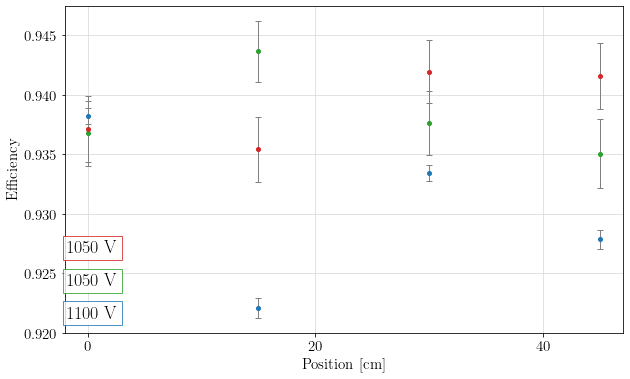

In [34]:
# Create a single figure for the three curves
plt.figure(figsize = FIGSIZE_1_1)

for iPlot, (df, voltage) in enumerate(zip(dataframes, voltages)):
    plt.errorbar(
        df['x [cm]'], df['epsilon'], 
        yerr=df['sigma_epsilon'],  # Error bar values
        fmt='o', markersize=4, linewidth=0, color=COLORI_TRE[iPlot],  # Marker and line settings
        ecolor='gray', elinewidth=1, capsize=3  # Error bar style
    )
    
    plt.text(-2.55, 0.06 + iPlot*0.1,  # Coordinate relative (x, y)
        f'{voltage} V', 
        fontsize=FONT_DIM[2], 
        bbox=dict(facecolor='white', alpha=GRID_ALPHA, edgecolor=COLORI_TRE[iPlot]),
        transform=ax.transAxes,  # Usa ax.transAxes per le coordinate relative
        ha='right',  # Allineamento orizzontale a destra
        va='top')    # Allineamento verticale in alto
    
#plt.title('Efficiency vs Threshold Voltage', fontsize = FONT_DIM[1])
plt.xlabel('Position [cm]', fontsize = FONT_DIM[1])
plt.ylabel('Efficiency', fontsize = FONT_DIM[1])

plt.xticks(Asse_x[1050], fontsize = FONT_DIM[1])
plt.yticks(fontsize = FONT_DIM[1])

plt.xlim(-2, df['x [cm]'].max() + 2)

plt.grid(True, color = 'lightgray',  alpha = GRID_ALPHA)

if ESPORTA_IMMGAGINI:
    plt.savefig(CARTELLA_IMMAGINI + "2_3_efficienza_completo" + FORMATO_IMMAGINI, bbox_inches = "tight", dpi=DPI)

plt.show()